<a href="https://colab.research.google.com/github/triatebr/aprenda-python/blob/master/CNR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logos](https://mundogeo.com/wp-content/uploads/2014/01/Plataforma-Dados-Abertos.jpg)


Hoje teremos contato com os conceitos/prática de **Dados Abertos** e realizaremos uma análise exploratória usando comandos do **Python** via [Colab.research](https://colab.research.google.com/notebooks/welcome.ipynb)

Para tanto usaremos conceitos de **Dataframe!?!?!** <p>


**Estruturas de dados no Pandas** <p>
**Séries :**<p>
Uma matriz uni-dimensional capaz de conter qualquer tipo de dado<p>
s = pd.Series([3, -5, 7, 4], index=[‘a’, ‘b’, ‘c’, ‘d’])<p>
  
![alt text](https://www.vooo.pro/insights/wp-content/uploads/2018/01/pandas1.png)
  
**Frame de dados (Data frame) :**<p>
Uma estrutura de dados bi-dimensional com colunas de diferentes tipos<p>

data = {‘País’: [‘Portugal’, ‘Peru’, ‘Chile’], ‘Capital’: [‘Lisboa’, ‘Lima’, ‘Santiago’], ‘População’: [751000, 1120000, 695000]}<p>
df = pd.DataFrame(data, columns=[‘País’, ‘Capital’, ‘População’])<p>
  
![alt text](https://www.vooo.pro/insights/wp-content/uploads/2018/01/pandas2.png)
  
[fonte](https://www.vooo.pro/insights/guia-de-acesso-rapido-ao-pandas/)

![logos](https://cdn.iconscout.com/icon/premium/png-256-thumb/import-data-832046.png)<p>
Vamos importar os arquivos para o nosso 'ambiente':<p>
  - 'conare.csv'<p>
  - 'decisoes-conare-ate-jan-2019.xlsx'<p>
  - '1990-a-2019-solicitacoes-de-reconhecimento-da-condicao-de-refugiado.xlsx'<p>


In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import io
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving conare.csv to conare (2).csv


In [0]:
dfc = pd.read_csv(io.BytesIO(uploaded['conare.csv']),encoding ='latin', delimiter=";")

In [5]:
dfc.head()

,Status,Protocolo,Ano Solicitação,SEI,Nome Solicitante,Sexo,Estado Civil,Data Nascimento,Idade Solicitação,País de Origem,Continente,Data Solicitação,Cidade Solicitação,UF Solicitação,Data Decisão,Ano Decisão,Motivo Arquivamento,Data Arquivamento
0,ARQUIVADOS,1,2015,SIM,1,MASCULINO,SOLTEIRO(A),12/07/1968,46,TANZÂNIA,África,1/29/2015,São Paulo,SP,11/20/2015,2015,Outros,09/11/2015
1,ARQUIVADOS,2,2013,SIM,2,FEMININO,VIÚVO(A),04/11/1951,62,NIGÉRIA,África,6/26/2013,São Paulo,SP,11/20/2015,2015,Decisão Cnig Res. 27,1/19/2016
2,ARQUIVADOS,3,2013,SIM,3,FEMININO,MENOR,10/08/2005,7,COLÔMBIA,América Do Sul,09/11/2013,Tabatinga,AM,NaN,Não Julgado,Desistência Voluntária,04/04/2016
3,ARQUIVADOS,4,2013,SIM,4,FEMININO,MENOR,11/06/2007,5,COLÔMBIA,América Do Sul,09/11/2013,Tabatinga,AM,NaN,Não Julgado,Desistência Voluntária,04/04/2016
4,ARQUIVADOS,5,2013,SIM,5,MASCULINO,CASADO(A),08/04/1976,37,COLÔMBIA,América Do Sul,09/11/2013,Tabatinga,AM,NaN,Não Julgado,Desistência Voluntária,04/04/2016


Informação **CONTINENTE**

In [7]:
# Para sabermos os valores únicos de uma determinada coluna, usamos o 'unique()'
dfc['Continente'].unique()

array(['África', 'América Do Sul', 'Ásia', 'América Central', 'Europa',
       'Oriente Médio', 'Apátrida', 'América Do Norte'], dtype=object)

In [8]:
# Agrupando dados, inicialmente por Continente
dfc['Continente'].value_counts()

África              21070
Ásia                 5815
Oriente Médio        5586
América Do Sul       3132
América Central      2142
Europa                990
América Do Norte       35
Apátrida               12
Name: Continente, dtype: int64

In [9]:
# Valores contados também podem ser normalizados para expressar porcentagens
dfc["Continente"].value_counts(normalize=True)

África              0.543293
Ásia                0.149941
Oriente Médio       0.144036
América Do Sul      0.080759
América Central     0.055232
Europa              0.025527
América Do Norte    0.000902
Apátrida            0.000309
Name: Continente, dtype: float64

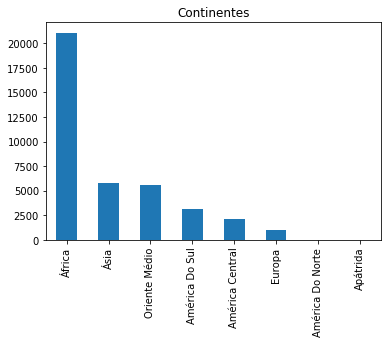

In [11]:
dfc["Continente"].value_counts().plot.bar(title="Continentes")
plt.show()

In [18]:
#selecionando apenas do 'Continente' da América Do Norte
dfc.loc[(dfc['Continente'] == 'América Do Norte')]

,Status,Protocolo,Ano Solicitação,SEI,Nome Solicitante,Sexo,Estado Civil,Data Nascimento,Idade Solicitação,País de Origem,Continente,Data Solicitação,Cidade Solicitação,UF Solicitação,Data Decisão,Ano Decisão,Motivo Arquivamento,Data Arquivamento
4059,ARQUIVADOS,4060,2004,NÃO,4060,MASCULINO,SOLTEIRO(A),8/26/1972,31,MÉXICO,América Do Norte,07/07/2004,São Paulo,SP,NaN,Não Julgado,Desistência Voluntária,Desconhecido
4653,ARQUIVADOS,4654,2015,SIM,4654,MASCULINO,SOLTEIRO(A),11/03/1975,39,ESTADOS UNIDOS,América Do Norte,5/22/2015,Brasília,DF,NaN,Não Julgado,Desconhecido,01/06/2016
5092,ARQUIVADOS,5093,2015,SIM,5093,MASCULINO,SOLTEIRO(A),06/10/1963,52,ESTADOS UNIDOS,América Do Norte,7/21/2015,Brasília,DF,NaN,Não Julgado,NaN,4/25/2016
5169,ARQUIVADOS,5170,2015,SIM,5170,MASCULINO,CASADO(A),3/17/1971,43,MÉXICO,América Do Norte,1/26/2015,Rio De Janeiro,RJ,NaN,Não Julgado,NaN,4/25/2016
5670,INDEFERIDOS,5671,2010,NÃO,5671,FEMININO,MENOR,12/28/2008,1,ESTADOS UNIDOS,América Do Norte,11/22/2010,Rio De Janeiro,RJ,3/18/2011,2011,NaN,NaN
6138,INDEFERIDOS,6139,2010,NÃO,6139,FEMININO,CASADO(A),7/13/2010,0,ESTADOS UNIDOS,América Do Norte,7/13/2010,Joinville,SC,3/18/2011,2011,NaN,NaN
6242,INDEFERIDOS,6243,2010,NÃO,6243,MASCULINO,MENOR,7/21/2004,6,ESTADOS UNIDOS,América Do Norte,11/22/2010,Rio De Janeiro,RJ,3/18/2011,2011,NaN,NaN
6348,INDEFERIDOS,6349,2012,NÃO,6349,MASCULINO,CASADO(A),5/21/1969,43,ESTADOS UNIDOS,América Do Norte,7/25/2012,Pacaraíma,RR,01/03/2014,2014,NaN,NaN
6528,INDEFERIDOS,6529,2012,NÃO,6529,FEMININO,CASADO(A),05/07/1979,33,ESTADOS UNIDOS,América Do Norte,7/25/2012,Pacaraíma,RR,01/03/2014,2014,NaN,NaN
7128,INDEFERIDOS,7129,2010,NÃO,7129,MASCULINO,CASADO(A),12/18/1962,47,ESTADOS UNIDOS,América Do Norte,11/22/2010,Rio De Janeiro,RJ,3/18/2011,2011,NaN,NaN


In [19]:
#selecionando apenas do 'Continente' da América Do Norte e 'Sexo' Masculino
dfc.loc[(dfc['Continente'] == 'América Do Norte') & (dfc['Sexo'] =='MASCULINO')]

,Status,Protocolo,Ano Solicitação,SEI,Nome Solicitante,Sexo,Estado Civil,Data Nascimento,Idade Solicitação,País de Origem,Continente,Data Solicitação,Cidade Solicitação,UF Solicitação,Data Decisão,Ano Decisão,Motivo Arquivamento,Data Arquivamento
4059,ARQUIVADOS,4060,2004,NÃO,4060,MASCULINO,SOLTEIRO(A),8/26/1972,31,MÉXICO,América Do Norte,07/07/2004,São Paulo,SP,NaN,Não Julgado,Desistência Voluntária,Desconhecido
4653,ARQUIVADOS,4654,2015,SIM,4654,MASCULINO,SOLTEIRO(A),11/03/1975,39,ESTADOS UNIDOS,América Do Norte,5/22/2015,Brasília,DF,NaN,Não Julgado,Desconhecido,01/06/2016
5092,ARQUIVADOS,5093,2015,SIM,5093,MASCULINO,SOLTEIRO(A),06/10/1963,52,ESTADOS UNIDOS,América Do Norte,7/21/2015,Brasília,DF,NaN,Não Julgado,NaN,4/25/2016
5169,ARQUIVADOS,5170,2015,SIM,5170,MASCULINO,CASADO(A),3/17/1971,43,MÉXICO,América Do Norte,1/26/2015,Rio De Janeiro,RJ,NaN,Não Julgado,NaN,4/25/2016
6242,INDEFERIDOS,6243,2010,NÃO,6243,MASCULINO,MENOR,7/21/2004,6,ESTADOS UNIDOS,América Do Norte,11/22/2010,Rio De Janeiro,RJ,3/18/2011,2011,NaN,NaN
6348,INDEFERIDOS,6349,2012,NÃO,6349,MASCULINO,CASADO(A),5/21/1969,43,ESTADOS UNIDOS,América Do Norte,7/25/2012,Pacaraíma,RR,01/03/2014,2014,NaN,NaN
7128,INDEFERIDOS,7129,2010,NÃO,7129,MASCULINO,CASADO(A),12/18/1962,47,ESTADOS UNIDOS,América Do Norte,11/22/2010,Rio De Janeiro,RJ,3/18/2011,2011,NaN,NaN
7183,INDEFERIDOS,7184,2014,SIM,7184,MASCULINO,DIVORCIADO(A),11/24/1982,31,ESTADOS UNIDOS,América Do Norte,5/26/2014,Rio De Janeiro,RJ,10/22/2015,2015,NaN,NaN
8098,INDEFERIDOS,8099,2010,NÃO,8099,MASCULINO,MENOR,11/18/1999,11,ESTADOS UNIDOS,América Do Norte,11/22/2010,Rio De Janeiro,RJ,3/18/2011,2011,NaN,NaN
11004,INDEFERIDOS,11005,2006,NÃO,11005,MASCULINO,CASADO(A),1/15/1972,34,ESTADOS UNIDOS,América Do Norte,8/29/2006,Recife,PE,12/13/2006,2006,NaN,NaN


Informação **STATUS**

In [21]:
dfc['Status'].unique()

array(['ARQUIVADOS', 'CESSAÃ\x87ÃO', 'INDEFERIDOS', 'PERDA',
       'PROCESSOS PENDENTES', 'RECONHECIDOS', 'RECONHECIDOS ACNUR',
       'RECURSOS', 'REGULARIZAÃ\x87ÃO CNIG'], dtype=object)

In [23]:
dfc['Status'].value_counts()

PROCESSOS PENDENTES    17510
RECONHECIDOS            6722
INDEFERIDOS             6413
ARQUIVADOS              5220
RECONHECIDOS ACNUR      1474
REGULARIZAÃÃO CNIG      742
RECURSOS                 404
PERDA                    274
CESSAÃÃO                 23
Name: Status, dtype: int64

In [25]:
#selecionando registros da 'ÍNDIA' e com Status de 'RECONHECIDOS' 
dfc.loc[(dfc['Status'] == 'RECONHECIDOS') & (dfc['País de Origem'] =='ÍNDIA')]

,Status,Protocolo,Ano Solicitação,SEI,Nome Solicitante,Sexo,Estado Civil,Data Nascimento,Idade Solicitação,País de Origem,Continente,Data Solicitação,Cidade Solicitação,UF Solicitação,Data Decisão,Ano Decisão,Motivo Arquivamento,Data Arquivamento
29478,RECONHECIDOS,29479,2014,SIM,29479,MASCULINO,CASADO(A),11/22/1978,35,ÍNDIA,Ásia,9/18/2014,São Paulo,SP,4/29/2016,2016,NaN,NaN
31647,RECONHECIDOS,31649,2012,NÃO,31649,MASCULINO,SOLTEIRO(A),04/04/1989,23,ÍNDIA,Ásia,12/21/2012,São Paulo,SP,12/17/2013,2013,NaN,NaN


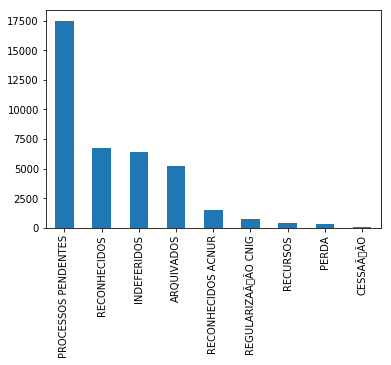

In [27]:
dfc["Status"].value_counts().plot.bar()
plt.show()

In [0]:
# Fonte dos dados: http://dados.gov.br/dataset/comite-nacional-para-os-refugiados
url = 'https://www.justica.gov.br/seus-direitos/refugio/anexos/1990-a-2019-solicitacoes-de-reconhecimento-da-condicao-de-refugiado.xlsx'

In [0]:
dfs = pd.read_excel(url,enconding='latin',delimiter=";")

In [0]:
# Visualização das 5 primeiras linhas do dataframe, mas caso prefira mais linhas? insira o numero entre os '()'
# Costuma-se usar nome sugestivos para os Dataframes, com foco na facilidade de lembrar e usar
dfs.head()

,Tipo de Alertas e Restrições,Nacionalidade,Mês/Ano,UF,Quantidade
0,SOLICITAÇÃO DE REFÚGIO,AFEGANISTÃO,12/2001,DF,1
1,SOLICITAÇÃO DE REFÚGIO,AFEGANISTÃO,01/2010,DF,1
2,SOLICITAÇÃO DE REFÚGIO,AFEGANISTÃO,03/2010,DF,2
3,SOLICITAÇÃO DE REFÚGIO,AFEGANISTÃO,03/2010,SP,2
4,SOLICITAÇÃO DE REFÚGIO,AFEGANISTÃO,08/2010,DF,1


In [0]:
# Quantidade de linhas e colunas do dataframe
dfs.shape

(11656, 5)

In [0]:
# Todas as colunas do dataframe
dfs.columns

Index(['Tipo de Alertas e Restrições', 'Nacionalidade', 'Mês/Ano', 'UF',
       'Quantidade'],
      dtype='object')

In [0]:
# Após a importação e visualização, como serão as colunas e características do nosso Dataframe?
dfs.dtypes

Tipo de Alertas e Restrições    object
Nacionalidade                   object
Mês/Ano                         object
UF                              object
Quantidade                       int64
dtype: object

Informação **NACIONALIDADE**

In [0]:
# Para sabermos os valores únicos de uma determinada coluna, usamos o 'unique()'
dfs['Nacionalidade'].unique()

array(['AFEGANISTÃO', 'ALBÂNIA', 'ALEMANHA', 'ANDORRA', 'ANGOLA',
       'APÁTRIDA', 'ARGENTINA', 'ARGÉLIA', 'ARMÊNIA', 'ARÁBIA SAUDITA',
       'AUSTRÁLIA', 'BANGLADESH', 'BARBADOS', 'BAREINE', 'BELARUS',
       'BELIZE', 'BENIN', 'BHUTAN', 'BOLÍVIA', 'BRASIL', 'BULGÁRIA',
       'BURKINA FASO', 'BURUNDI', 'BUTÃO', 'BÉLGICA',
       'BÓSNIA E HERZEGOVINA', 'CABO VERDE', 'CAMARÕES', 'CAMBOJA',
       'CANADÁ', 'CAZAQUISTÃO', 'CHILE', 'CHINA', 'COLÔMBIA', 'CONGO',
       'CORÉIA DO NORTE', 'CORÉIA DO SUL', 'COSTA DO MARFIM',
       'COSTA RICA', 'CROÁCIA', 'CUBA', 'DAOME', 'DINAMARCA', 'DJIBUTI',
       'DOMINICA', 'EGITO', 'EL SALVADOR', 'EMIRADOS ÁRABES', 'EQUADOR',
       'ERITRÉIA', 'ESLOVÁQUIA', 'ESPANHA', 'ESTADOS UNIDOS', 'ESTÔNIA',
       'ETIÓPIA', 'FIJI, ILHAS', 'FILIPINAS', 'FRANÇA', 'GABÃO', 'GANA',
       'GEÓRGIA', 'GRÉCIA', 'GUAM', 'GUATEMALA', 'GUIANA',
       'GUIANA FRANCESA', 'GUINÉ', 'GUINÉ BISSAU', 'GUINÉ EQUATORIAL',
       'GÂMBIA', 'HAITI', 'HONDURAS', 'HUNGRIA',

In [0]:
# Agrupando dados, inicialmente por Nacionalidade
dfs['Nacionalidade'].value_counts()

CUBA                              887
HAITI                             775
VENEZUELA                         665
COLÔMBIA                          556
SENEGAL                           469
SÍRIA                             466
BANGLADESH                        385
GUINÉ BISSAU                      371
ANGOLA                            343
CONGO                             337
PAQUISTÃO                         325
GANA                              298
NIGÉRIA                           294
REP. DOMINICANA                   289
LÍBANO                            255
GUINÉ                             219
MARROCOS                          178
IRAQUE                            164
PALESTINA                         150
ÍNDIA                             147
NACIONALIDADE INDEFINIDA          144
EGITO                             137
SERRA LEOA                        132
TOGO                              131
CAMARÕES                          124
SOMÁLIA                           122
REPÚBLICA DE

In [0]:
#selecionando uma Nacionalidade específica
dfs.loc[(dfs['Nacionalidade'] == 'BOLÍVIA')]

,Tipo de Alertas e Restrições,Nacionalidade,Mês/Ano,UF,Quantidade
1082,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,02/2002,SP,1
1083,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,06/2002,SP,7
1084,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,07/2002,SP,1
1085,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,01/2006,SP,1
1086,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,07/2006,SP,1
1087,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,11/2008,AC,16
1088,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,11/2008,DF,3
1089,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,11/2008,RO,3
1090,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,12/2008,AC,35
1091,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,12/2008,DF,5


In [0]:
dfs.loc[(dfs['Nacionalidade'] == 'BOLÍVIA')  & (dfs['UF'] =='AM')]

,Tipo de Alertas e Restrições,Nacionalidade,Mês/Ano,UF,Quantidade
1157,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,10/2016,AM,1
1169,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,01/2018,AM,1
1173,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,05/2018,AM,1
1178,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,07/2018,AM,1
1179,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,08/2018,AM,1
1184,SOLICITAÇÃO DE REFÚGIO,BOLÍVIA,10/2018,AM,4


In [0]:
#selecionando + de 1 Nacionalidade específica
dfs.loc[(dfs['Nacionalidade'] == 'UZBEQUISTÃO')  | (dfs['Nacionalidade'] =='ESTÔNIA')]

,Tipo de Alertas e Restrições,Nacionalidade,Mês/Ano,UF,Quantidade
3960,SOLICITAÇÃO DE REFÚGIO,ESTÔNIA,12/2017,AM,1
10693,SOLICITAÇÃO DE REFÚGIO,UZBEQUISTÃO,07/2009,DF,1
10694,SOLICITAÇÃO DE REFÚGIO,UZBEQUISTÃO,06/2018,SP,2


![logos](https://d1nhio0ox7pgb.cloudfront.net/_img/o_collection_png/green_dark_grey/256x256/plain/table.png)

Outro **Dataframe** agora ...

In [0]:
url1 = 'https://www.justica.gov.br/seus-direitos/refugio/anexos/decisoes-conare-ate-jan-2019.xlsx'

In [0]:
dfd = pd.read_excel(url1,enconding='latin',delimiter=";")

In [0]:
dfd.head()

,TOTAL= 1510,STATUS,DATA SOLICITAÇÃO,PAÍS DE ORIGEM,GÊNERO,ANO DE NASCIMENTO,CIDADE SOLICITAÇÃO,ANO DECISÃO
0,NaN,ELEGIBILIDADE / DEFERIMENTO,1993-04-15,ANGOLA,NaN,Desconhecido,RJ (RIO DE JANEIRO),1993.000000
1,NaN,ELEGIBILIDADE / DEFERIMENTO,1993-04-15,ANGOLA,NaN,Desconhecido,RJ (RIO DE JANEIRO),1994.487979
2,NaN,ELEGIBILIDADE / DEFERIMENTO,1995-06-22,LIBÉRIA,NaN,Desconhecido,RJ (RIO DE JANEIRO),1995.000000
3,NaN,ELEGIBILIDADE / DEFERIMENTO,1995-06-22,LIBÉRIA,NaN,Desconhecido,RJ (RIO DE JANEIRO),1994.487866
4,NaN,ELEGIBILIDADE / DEFERIMENTO,1992-07-22,APÁTRIDA,NaN,Desconhecido,RJ (RIO DE JANEIRO),1992.000000


In [0]:
dfg = dfd.drop(['TOTAL= 1510'], axis=1)

In [0]:
# quantidade de linhas e colunas do dataframe
dfg.shape

(1515, 7)

In [0]:
# as últimas 5 linhas
dfg.head()

,STATUS,DATA SOLICITAÇÃO,PAÍS DE ORIGEM,GÊNERO,ANO DE NASCIMENTO,CIDADE SOLICITAÇÃO,ANO DECISÃO
0,ELEGIBILIDADE / DEFERIMENTO,1993-04-15,ANGOLA,NaN,Desconhecido,RJ (RIO DE JANEIRO),1993.000000
1,ELEGIBILIDADE / DEFERIMENTO,1993-04-15,ANGOLA,NaN,Desconhecido,RJ (RIO DE JANEIRO),1994.487979
2,ELEGIBILIDADE / DEFERIMENTO,1995-06-22,LIBÉRIA,NaN,Desconhecido,RJ (RIO DE JANEIRO),1995.000000
3,ELEGIBILIDADE / DEFERIMENTO,1995-06-22,LIBÉRIA,NaN,Desconhecido,RJ (RIO DE JANEIRO),1994.487866
4,ELEGIBILIDADE / DEFERIMENTO,1992-07-22,APÁTRIDA,NaN,Desconhecido,RJ (RIO DE JANEIRO),1992.000000


In [0]:
# após a importação e visualização, como serão as colunas e características do nosso Dataframe?
dfg.dtypes

STATUS                        object
DATA SOLICITAÇÃO      datetime64[ns]
PAÍS DE ORIGEM                object
GÊNERO                        object
ANO DE NASCIMENTO             object
CIDADE SOLICITAÇÃO            object
ANO DECISÃO                  float64
dtype: object

In [0]:
dfg['PAÍS DE ORIGEM'].value_counts()

ANGOLA                   861
LIBÉRIA                  182
ZAIRE                     93
CUBA                      64
IRAQUE                    57
IUGOSLÁVIA                37
PERU                      28
SERRA LEOA                20
IRÃ                       17
RUANDA                    15
ARGENTINA                 13
NIGÉRIA                   12
LÍBANO                    11
SOMÁLIA                   10
SUDÃO                      8
APÁTRIDA                   7
SÉRVIA                     5
GANA                       5
MACEDÔNIA                  5
ETIÓPIA                    4
EL SALVADOR                4
ARGÉLIA                    4
EGITO                      4
CROÁCIA                    4
VIETNÃ                     3
ÁFRICA DO SUL              3
SÍRIA                      3
LÍBIA                      3
ARMÊNIA                    2
MOÇAMBIQUE                 2
CAMARÕES                   2
GUIANA                     2
PALESTINA                  2
TANZANIA                   2
REPÚBLICA DOMI

In [0]:
dfg['STATUS'].value_counts()

ELEGIBILIDADE / DEFERIMENTO    1503
Name: STATUS, dtype: int64